### Exploratory Data Analysis on Processed Data

- Complex plots will be plotted using Tableau.
- 0 represents null value every where.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=10,5

import seaborn as sns
sns.set_theme()

import warnings
warnings.filterwarnings('ignore')



In [2]:
file_path='../data/processed/processed_data.xlsx'
sheet_names=pd.ExcelFile(file_path).sheet_names
print(sheet_names)

['Sales_Data', 'Region', 'Division', 'Customers_Address', 'Customers']


In [8]:
region_df=pd.read_excel(file_path,'Region')
region_df.head(10)  

,Region Code,Region Name
0,0,Canada
1,1,Western
2,2,Southern
3,3,Northeast
4,4,Central
5,5,International


In [23]:
region_data_dic=region_df.to_dict()
region_map=region_data_dic['Region Name']
region_map

{0: 'Canada',
 1: 'Western',
 2: 'Southern',
 3: 'Northeast',
 4: 'Central',
 5: 'International'}

In [27]:
division_df=pd.read_excel(file_path,'Division',index_col=0)
division_df.head()

,Division Name
Division,
1,International
2,Domestic


In [32]:
division_map=division_df.to_dict()
division_map=division_map['Division Name']
division_map

{1: 'International', 2: 'Domestic'}

In [91]:
customers_df=pd.read_excel(file_path,'Customers')
customers_df.head()  ######### 0 means null lkho upar

,Address Number,Business Family,Business Unit,Customer,Customer Number,Customer Type,Division,Line of Business,Phone,Region Code,Regional Sales Mgr,Search Type
0,10000000,R3,1,City Supermarket,10000000,G2,2,0,816-455-8733,4,S16,C
1,10000453,R3,1,A Supermarket,10000453,G1,1,0,816-455-8733,5,S19,C
2,10000455,R3,1,Caribian Supermarket,10000455,G2,2,0,816-455-8733,1,S16,C
3,10000456,R1,1,A&B Shop,10000456,G3,1,0,816-455-8733,0,S2,C
4,10000457,O2,1,A&G Shop,10000457,G1,1,0,816-455-8733,5,S1,C


In [92]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Address Number      684 non-null    int64 
 1   Business Family     684 non-null    object
 2   Business Unit       684 non-null    int64 
 3   Customer            684 non-null    object
 4   Customer Number     684 non-null    int64 
 5   Customer Type       684 non-null    object
 6   Division            684 non-null    int64 
 7   Line of Business    684 non-null    object
 8   Phone               684 non-null    object
 9   Region Code         684 non-null    int64 
 10  Regional Sales Mgr  684 non-null    object
 11  Search Type         684 non-null    object
dtypes: int64(5), object(7)
memory usage: 64.2+ KB


In [93]:
customers_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Address Number,684.0,1.001662e+07,7898.470369,10000000.0,10010910.5,10019172.0,10023509.25,10027629.0
Business Unit,684.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.00,1.0
Customer Number,684.0,1.001662e+07,7898.470369,10000000.0,10010910.5,10019172.0,10023509.25,10027629.0
Division,684.0,1.508772e+00,0.500289,1.0,1.0,2.0,2.00,2.0
Region Code,684.0,3.476608e+00,1.688227,0.0,2.0,4.0,5.00,5.0


In [94]:
customers_df['Division']=customers_df['Division'].map(division_map)

In [95]:
customers_df['Region Code']=customers_df['Region Code'].map(region_map)

In [96]:
customers_df.head()

,Address Number,Business Family,Business Unit,Customer,Customer Number,Customer Type,Division,Line of Business,Phone,Region Code,Regional Sales Mgr,Search Type
0,10000000,R3,1,City Supermarket,10000000,G2,Domestic,0,816-455-8733,Central,S16,C
1,10000453,R3,1,A Supermarket,10000453,G1,International,0,816-455-8733,International,S19,C
2,10000455,R3,1,Caribian Supermarket,10000455,G2,Domestic,0,816-455-8733,Western,S16,C
3,10000456,R1,1,A&B Shop,10000456,G3,International,0,816-455-8733,Canada,S2,C
4,10000457,O2,1,A&G Shop,10000457,G1,International,0,816-455-8733,International,S1,C


In [97]:
customers_df['Shop Type']=customers_df['Customer'].str.split(' ',expand=True)[1]
customers_df.head()

,Address Number,Business Family,Business Unit,Customer,Customer Number,Customer Type,Division,Line of Business,Phone,Region Code,Regional Sales Mgr,Search Type,Shop Type
0,10000000,R3,1,City Supermarket,10000000,G2,Domestic,0,816-455-8733,Central,S16,C,Supermarket
1,10000453,R3,1,A Supermarket,10000453,G1,International,0,816-455-8733,International,S19,C,Supermarket
2,10000455,R3,1,Caribian Supermarket,10000455,G2,Domestic,0,816-455-8733,Western,S16,C,Supermarket
3,10000456,R1,1,A&B Shop,10000456,G3,International,0,816-455-8733,Canada,S2,C,Shop
4,10000457,O2,1,A&G Shop,10000457,G1,International,0,816-455-8733,International,S1,C,Shop


In [213]:
customers_df['Shop Type'].isnull().sum()

11

<AxesSubplot:xlabel='count', ylabel='Shop Type'>

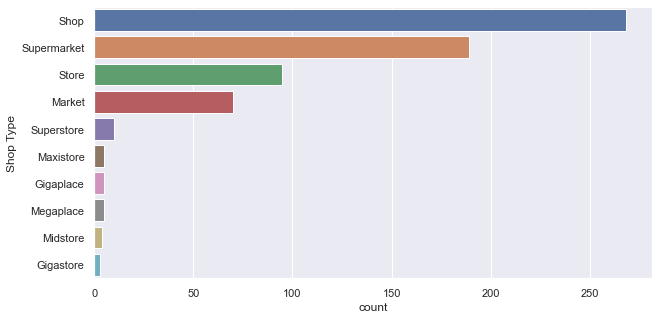

In [100]:
sns.countplot(data=customers_df,y=customers_df['Shop Type'],order=customers_df['Shop Type'].value_counts().iloc[:10].index)

<AxesSubplot:xlabel='Customer Type', ylabel='count'>

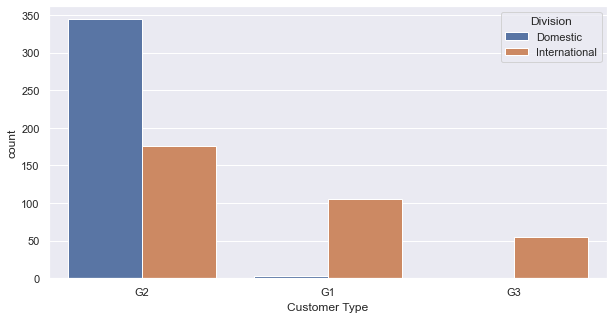

In [46]:
sns.countplot(data=customers_df,x='Customer Type',hue='Division')

<AxesSubplot:xlabel='Division', ylabel='count'>

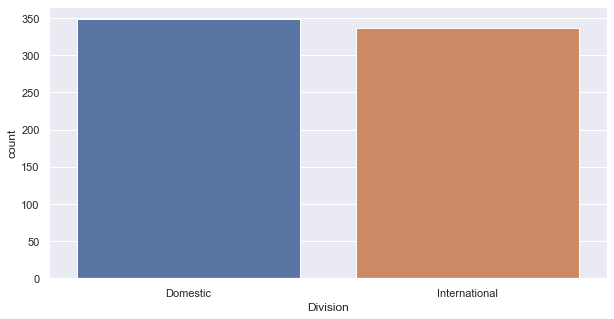

In [52]:
sns.countplot(data=customers_df,x='Division')

<AxesSubplot:xlabel='Region Code', ylabel='count'>

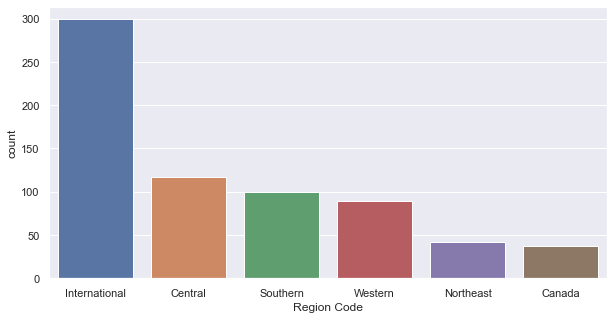

In [82]:
sns.countplot(data=customers_df,x='Region Code',order=customers_df['Region Code'].value_counts().index)

<AxesSubplot:xlabel='Regional Sales Mgr', ylabel='count'>

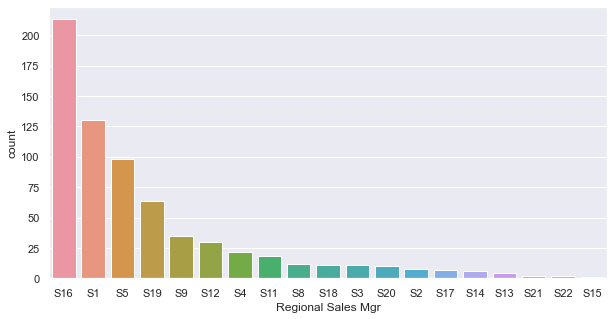

In [65]:
sns.countplot(data=customers_df,x='Regional Sales Mgr',order=customers_df['Regional Sales Mgr'].value_counts().index)

In [103]:
custom_add_df=pd.read_excel(file_path,'Customers_Address')
custom_add_df.head()  ######### 0 means null lkho upar

,Address Number,City,Country,Customer Address 1,Customer Address 2,Customer Address 3,Customer Address 4,State,Zip Code,Full Address
0,10000000,Akron,US,PO Box 6258,0,0,0,OH,44312,PO Box 6258 44312 Akron OH US
1,10000453,0,UK,0,0,0,0,0,0,UK
2,10000455,Huntington Beach,US,7392 Count Circle,0,0,0,CA,92647,7392 Count Circle 92647 Huntington Beach CA US
3,10000456,Edmonton,CA,8151 Wagner Road,0,0,0,AB,T6E 4N6,8151 Wagner Road T6E 4N6 Edmonton AB CA
4,10000458,Saginaw,US,PO Box 840,0,0,0,MI,48606,PO Box 840 48606 Saginaw MI US


<AxesSubplot:xlabel='Country', ylabel='count'>

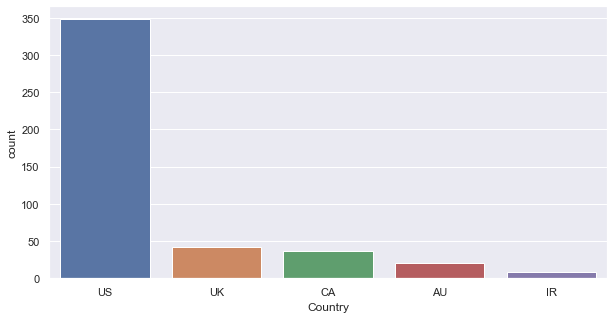

In [108]:
sns.countplot(data=custom_add_df,x='Country')

In [105]:
custom_add_df['City'].value_counts()

0                16
Overland Park     9
Sacramento        7
Edmonton          6
Tulsa             5
                 ..
Nashville         1
Monroe            1
South Bend        1
Philadelphia      1
Morton            1
Name: City, Length: 344, dtype: int64

In [109]:
sales_df=pd.read_excel(file_path,'Sales_Data')
sales_df.head()  ######### 0 means null lkho upar

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
0,10000481,2017-04-30,-237.91,2017-04-30,100012,0,0,Urban Large Eggs,2000,0.00,200015,2017-04-30,237.91,0.00,0.0,237.91,237.910000,1,184,EA
1,10002220,2017-07-14,368.79,2017-07-14,100233,P01,20910,Moms Sliced Turkey,1000,824.96,200245,2017-07-14,456.17,824.96,0.0,456.17,456.170000,1,127,EA
2,10002220,2017-10-17,109.73,2017-10-17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,213157,2017-10-16,438.93,548.66,0.0,438.93,438.930000,1,127,EA
3,10002489,2017-06-03,-211.75,2017-06-03,100096,0,0,Kiwi Lox,1000,0.00,200107,2017-06-03,211.75,0.00,0.0,211.75,211.750000,1,160,EA
4,10004516,2017-05-27,96627.94,2017-05-27,103341,P01,60776,High Top Sweet Onion,1000,408.52,203785,2017-05-28,89248.66,185876.60,0.0,89248.66,196.150901,455,124,SE


In [200]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65282 entries, 0 to 65281
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   CustKey                           65282 non-null  int64         
 1   DateKey                           65282 non-null  datetime64[ns]
 2   Discount Amount                   65282 non-null  float64       
 3   Invoice Date                      65282 non-null  datetime64[ns]
 4   Invoice Number                    65282 non-null  int64         
 5   Item Class                        65282 non-null  object        
 6   Item Number                       65282 non-null  object        
 7   Item                              65282 non-null  object        
 8   Line Number                       65282 non-null  int64         
 9   List Price                        65282 non-null  float64       
 10  Order Number                      65282 non-nu

<AxesSubplot:xlabel='Item'>

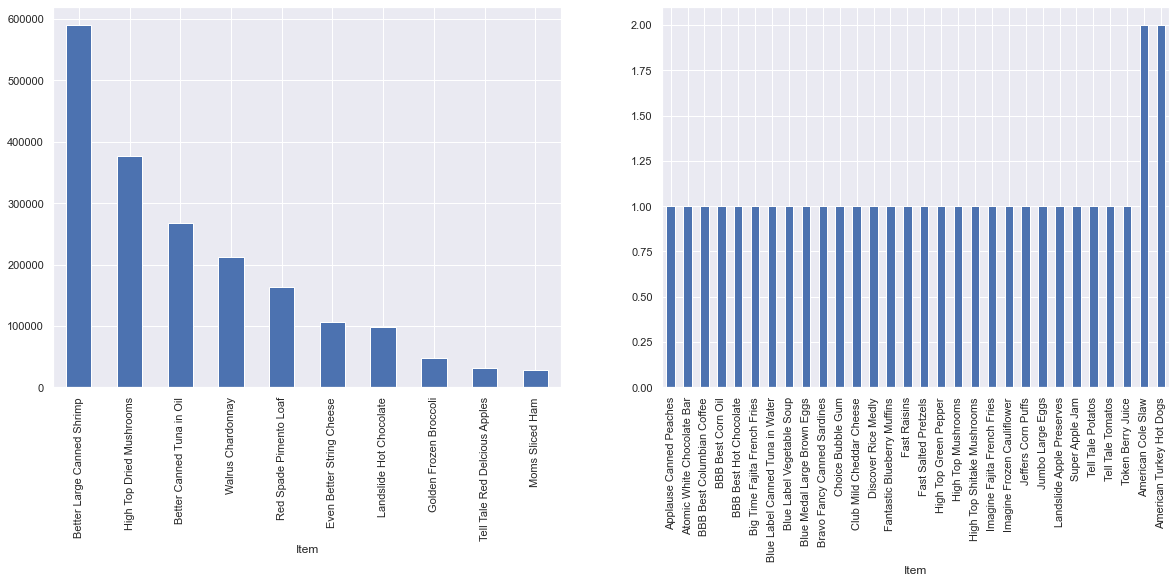

In [198]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sales_df.groupby('Item')['Sales Quantity'].sum().nlargest(10).plot(kind="bar",ax=ax[0])
sales_df.groupby('Item')['Sales Quantity'].sum().nsmallest(30).plot(kind="bar",ax=ax[1])

#### 💡 Insight

- Most sold item is Canned Shrimp.
- There are few items which are sold just once.

<AxesSubplot:xlabel='Sales Amount', ylabel='Discount Amount'>

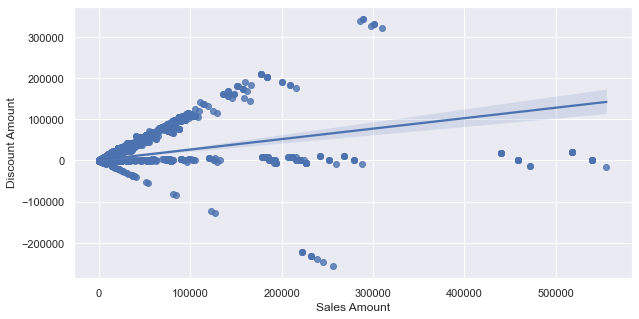

In [207]:
sns.regplot(y=sales_df['Discount Amount'],x=sales_df['Sales Amount'])

#### 💡 Insight

- The plot shows that greater the sales amount, the more discount is offered.

In [209]:
sales_customer=sales_df.merge(customers_df,left_on='CustKey',right_on='Customer Number',how='left')
sales_customer.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,...,Customer,Customer Number,Customer Type,Division,Line of Business,Phone,Region Code,Regional Sales Mgr,Search Type,Shop Type
0,10000481,2017-04-30,-237.91,2017-04-30,100012,0,0,Urban Large Eggs,2000,0.00,...,Abbott Shop,10000481,G2,Domestic,0,816-455-8733,Central,S5,C,Shop
1,10002220,2017-07-14,368.79,2017-07-14,100233,P01,20910,Moms Sliced Turkey,1000,824.96,...,ACRON Shop,10002220,G3,International,0,816-455-8733,Canada,S5,C,Shop
2,10002220,2017-10-17,109.73,2017-10-17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,...,ACRON Shop,10002220,G3,International,0,816-455-8733,Canada,S5,C,Shop
3,10002489,2017-06-03,-211.75,2017-06-03,100096,0,0,Kiwi Lox,1000,0.00,...,ACT Supermarket,10002489,G2,Domestic,0,816-455-8733,Southern,S16,C,Supermarket
4,10004516,2017-05-27,96627.94,2017-05-27,103341,P01,60776,High Top Sweet Onion,1000,408.52,...,Besicorp Shop,10004516,G1,International,M1,816-455-8733,International,S19,C,Shop


In [210]:
sales_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65812 entries, 0 to 65811
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   CustKey                           65812 non-null  int64         
 1   DateKey                           65812 non-null  datetime64[ns]
 2   Discount Amount                   65812 non-null  float64       
 3   Invoice Date                      65812 non-null  datetime64[ns]
 4   Invoice Number                    65812 non-null  int64         
 5   Item Class                        65812 non-null  object        
 6   Item Number                       65812 non-null  object        
 7   Item                              65812 non-null  object        
 8   Line Number                       65812 non-null  int64         
 9   List Price                        65812 non-null  float64       
 10  Order Number                      65812 non-nu

In [254]:
print('Order date range in years: ')
(sales_customer['DateKey'].max()-sales_customer['DateKey'].min())/np.timedelta64(1,'Y')

Order date range in years: 


2.9952702656454275

In [287]:
def item_info(item):
 
    return sales_df[sales_df['Item']==item]
    

item_info("Urban Large Eggs")
    

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
0,10000481,2017-04-30,-237.91,2017-04-30,100012,0,0,Urban Large Eggs,2000,0.00,200015,2017-04-30,237.91,0.0,0.00,237.91,237.910,1,184,EA
50760,10024006,2017-11-18,270.68,2017-11-18,118879,P01,61861,Urban Large Eggs,15000,122.68,212177,2017-11-18,342.72,613.4,124.02,218.70,68.544,5,157,EA
50761,10024006,2017-11-18,270.68,2017-11-18,118898,P01,61861,Urban Large Eggs,9000,122.68,214964,2017-11-18,342.72,613.4,124.02,218.70,68.544,5,157,EA
52687,10011052,2019-11-30,284.39,2019-11-30,318898,P01,61861,Urban Large Eggs,9000,122.68,114964,2019-11-30,329.01,613.4,124.02,204.99,65.802,5,157,EA
52688,10011052,2019-11-30,284.39,2019-11-30,318879,P01,61861,Urban Large Eggs,15000,122.68,112177,2019-11-30,329.01,613.4,124.02,204.99,65.802,5,157,EA


<AxesSubplot:xlabel='Region Code'>

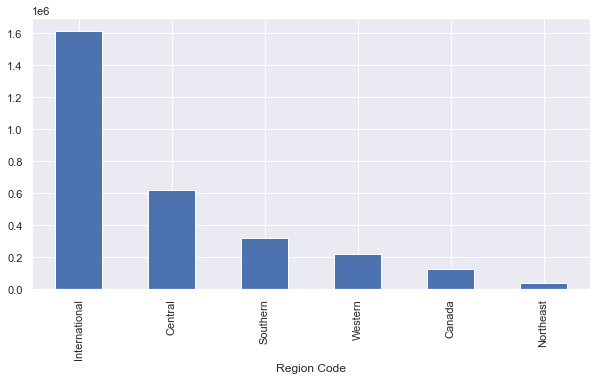

In [256]:
sales_customer.groupby('Region Code')['Sales Quantity'].sum().nlargest(10).plot(kind='bar')

#### 💡 Insight

- Most sales done in International region.

<AxesSubplot:xlabel='Customer'>

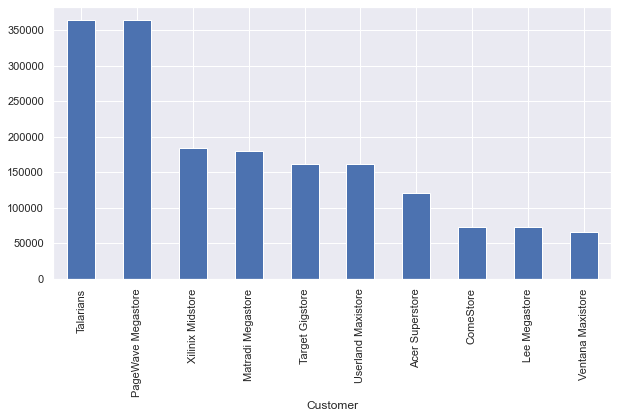

In [290]:
sales_customer.groupby('Customer')['Sales Quantity'].sum().nlargest(10).plot(kind='bar')

#### 💡 Insight

- Talarians and PageWave Megastore alone have been sold more than 70,000 of items. 

<AxesSubplot:xlabel='DateKey'>

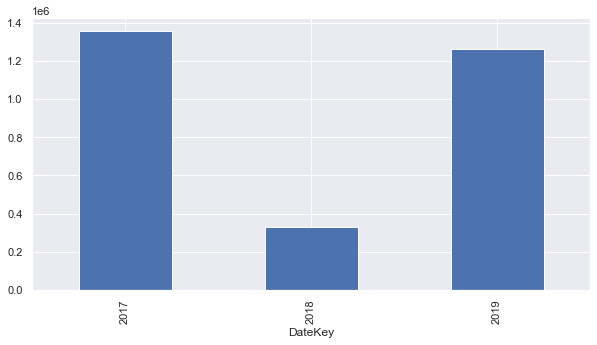

In [295]:
sales_customer.groupby(sales_customer.DateKey.dt.year)['Sales Quantity'].sum().plot(kind='bar')

#### 💡 Insight

- 2018 was the year with lowest sales.

<AxesSubplot:xlabel='DateKey'>

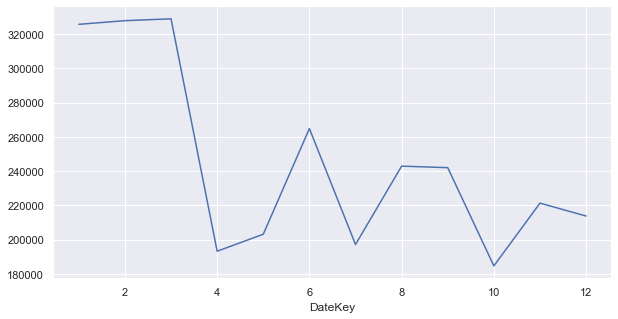

In [297]:
sales_customer.groupby(sales_customer.DateKey.dt.month)['Sales Quantity'].sum().plot(kind='line')

#### 💡 Insight

- The first 3 months of every year have record high sales.
- Why this happens, will figure out in Tableau report.